In [3]:
import numpy as np


shape of x: (150, 4)
shape of x_projected: (150, 2)


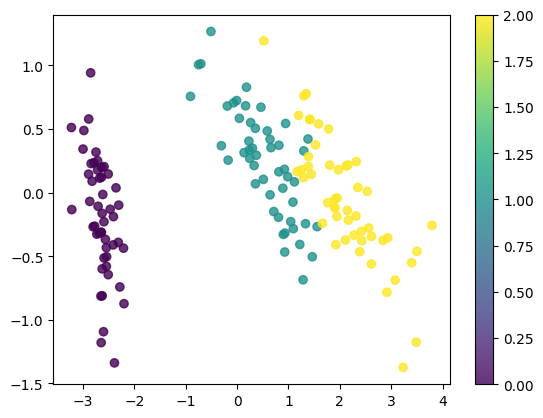

In [6]:
import numpy as np

class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, x):
        # mean
        # cov matrix
        # eigen vector & eigen values
        # sort eigen vectors dec
        # store first n eigen vectors

        
        # Compute mean
        self.mean = np.mean(x, axis=0)
        x = x - self.mean

        # Compute covariance matrix
        # row -> sameples & columns -> features
        # but the np.cov has ndarray with rows->features and cols->samples hence we will use x.T
        cov = np.cov(x.T)

        # Eigenvalues and eigenvectors
        # eigenvector returned by np.linalg.eig is column vectors
        eigenValues, eigenVectors = np.linalg.eig(cov)
        eigenVectors = eigenVectors.T

        # Sort eigenvalues in descending order
        idxs = np.argsort(eigenValues)[::-1]
        eigenValues = eigenValues[idxs]
        eigenVectors = eigenVectors[idxs]

        # Store first n eigenvectors
        self.components = eigenVectors[0:self.n_components]

    def transform(self, x):
        # Project data
        x = x - self.mean
        return np.dot(x, self.components.T)

# Test the PCA implementation
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_iris()
x = data.data
y = data.target

pca = PCA(2)
pca.fit(x)
x_proj = pca.transform(x)

print('shape of x:', x.shape)
print('shape of x_projected:', x_proj.shape)

x1 = x_proj[:, 0]
x2 = x_proj[:, 1]

plt.scatter(x1, x2, c=y, alpha=0.8)
plt.colorbar()
plt.show()
